### Importación de Bibliotecas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Creación de Datos Aleatorios

In [5]:
np.random.seed(42)

# Crear datos aleatorios con correlación
n_samples = 300

# Generar datos con correlación
x=np.random.randn(n_samples)
y=np.random.randn(n_samples)
z=0.6*x + 0.2*y + np.random.randn(n_samples)

### Creación de Matriz de datos

In [6]:
Matriz=np.column_stack((x,y,z))
print(Matriz.shape)

(300, 3)


### Escalamiento de Datos y Aplicación de PCA Manual

In [11]:
def pca(X, n_components):
    # Estandarizar los datos
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Calcular la matriz de covarianza
    cov_matrix = np.cov(X_std, rowvar=False)
    
    # Calcular eigenvalores y eigenvectores
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Ordenar los eigenvalores y eigenvectores
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Seleccionar los n_components principales
    components = eigenvectors[:, :n_components]
    
    # Proyectar los datos en el nuevo espacio
    X_pca = X_std @ components
    
    return X_pca, eigenvalues, eigenvectors


# Aplicar PCA manualmente
datos_2d, autovalores, autovectores = pca(Matriz, n_components=2)
print(f"Datos reducidos manualmentea 2D:\n{datos_2d[:5]}")  # Mostrar las primeras 5 filas
print(f"Autovalores: {autovalores}")
print(f"Autovectores:\n{autovectores}")



Datos reducidos manualmentea 2D:
[[ 0.76098431 -0.88534188]
 [-0.90164823 -0.58638263]
 [ 1.38472212  0.69982027]
 [ 2.59665362  0.40989881]
 [-0.04011328  0.06895436]]
Autovalores: [1.48723823 1.0224848  0.50031042]
Autovectores:
[[ 0.69212449 -0.24072727  0.68045137]
 [ 0.11861242  0.96786066  0.22175852]
 [ 0.71196544  0.07277452 -0.69843331]]


### Escalado y Aplicación de PCA con Scikit-learn

In [12]:
std=StandardScaler()
Matriz_std=std.fit_transform(Matriz)
pca_sklearn = PCA(n_components=2)
Matriz_pca = pca_sklearn.fit_transform(Matriz_std)
print(f"Datos reducidos con PCA de sklearn a 2D:\n{Matriz_pca[:5]}")  # Mostrar las primeras 5 filas
print(f"Varianza explicada por cada componente: {pca_sklearn.explained_variance_ratio_}")

Datos reducidos con PCA de sklearn a 2D:
[[ 0.76098431 -0.88534188]
 [-0.90164823 -0.58638263]
 [ 1.38472212  0.69982027]
 [ 2.59665362  0.40989881]
 [-0.04011328  0.06895436]]
Varianza explicada por cada componente: [0.49409359 0.33969217]


### Comparación Gráfica de Ambos Métodos

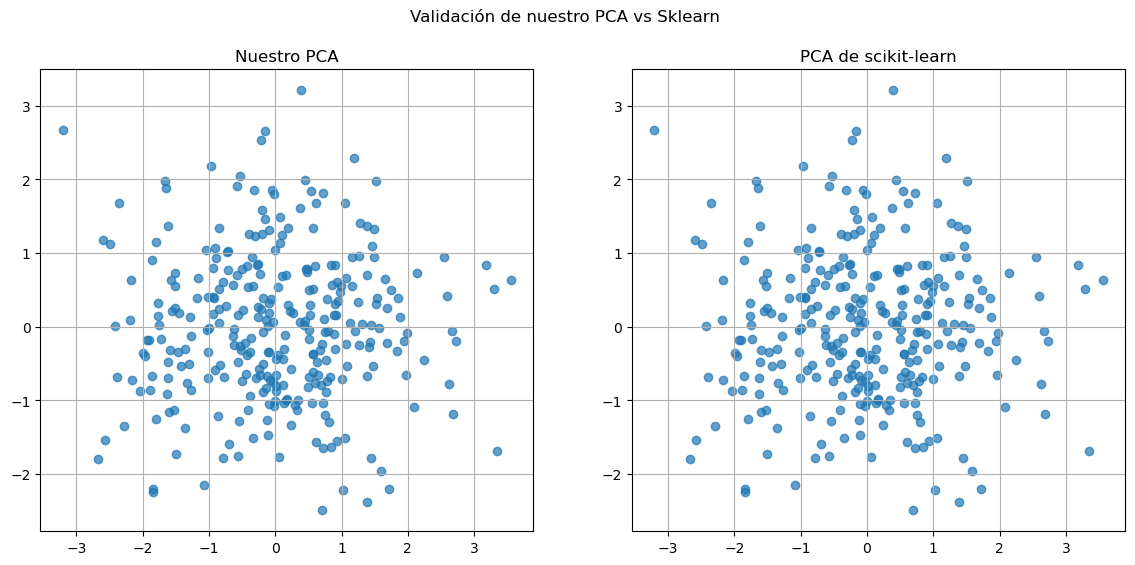

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(datos_2d[:, 0],datos_2d[:, 1], alpha=0.7)
ax1.set_title("Nuestro PCA")
ax1.grid(True)

ax2.scatter(Matriz_pca[:, 0],Matriz_pca[:, 1], alpha=0.7)
ax2.set_title("PCA de scikit-learn")
ax2.grid(True)

plt.suptitle("Validación de nuestro PCA vs Sklearn")
plt.show()